In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('housing_data.csv')

In [3]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [4]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [5]:
df.tail()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [8]:
df.duplicated().sum()

0

In [9]:
df1 = df.drop(["Unnamed: 0", 'Alley','MSZoning'], axis=1)
df1

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [10]:
df1.shape

(1460, 78)

       LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ..

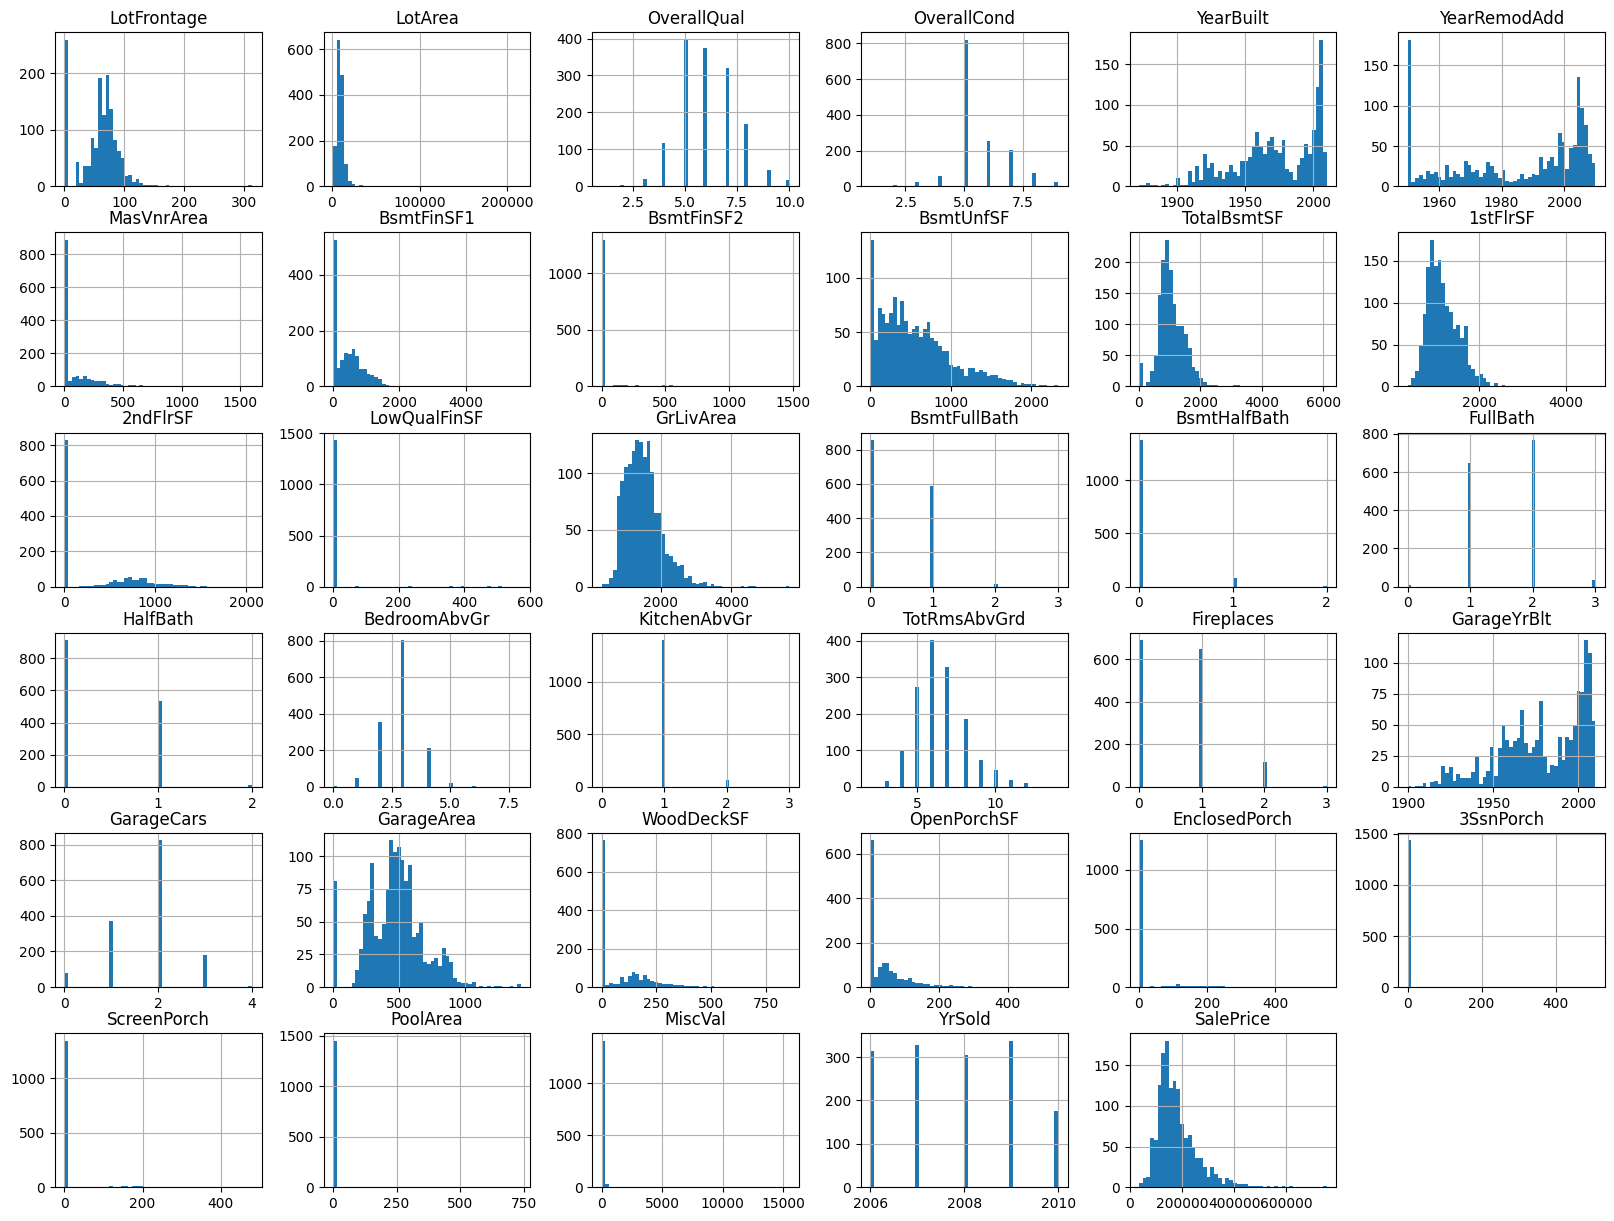

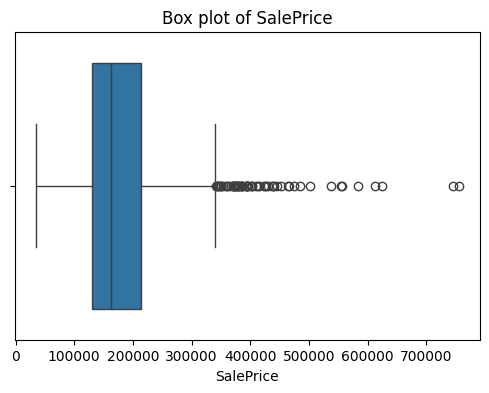

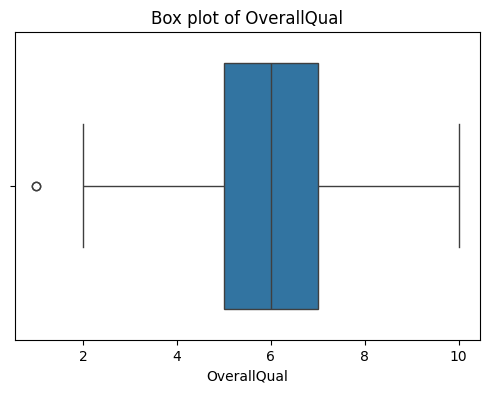

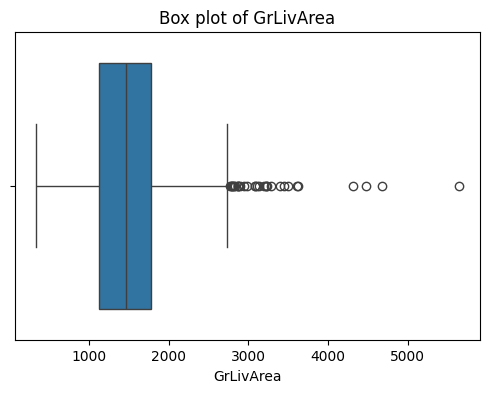

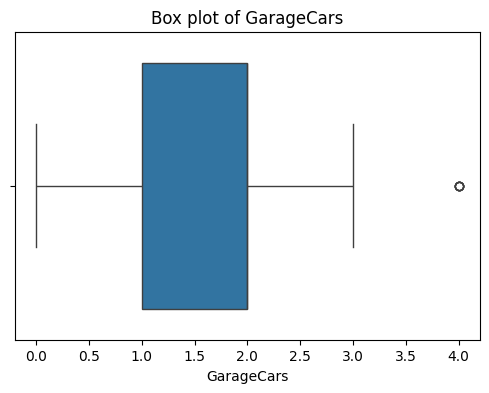

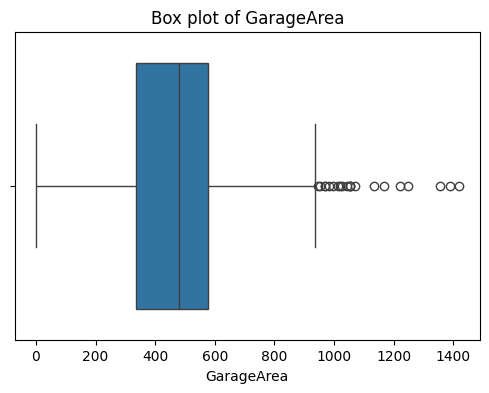

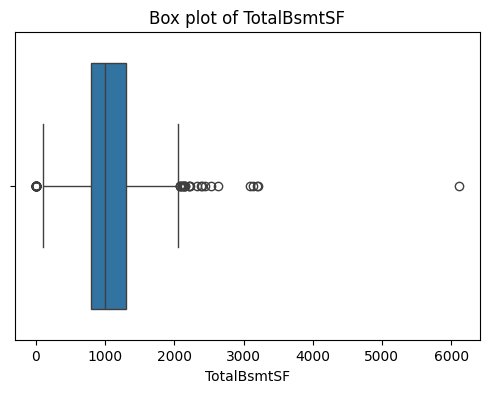

Value counts for MSSubClass:
MSSubClass
SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: count, dtype: int64

Value counts for Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Value counts for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Value counts for LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Value counts for Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Value counts for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Value counts for LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Value counts for Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113

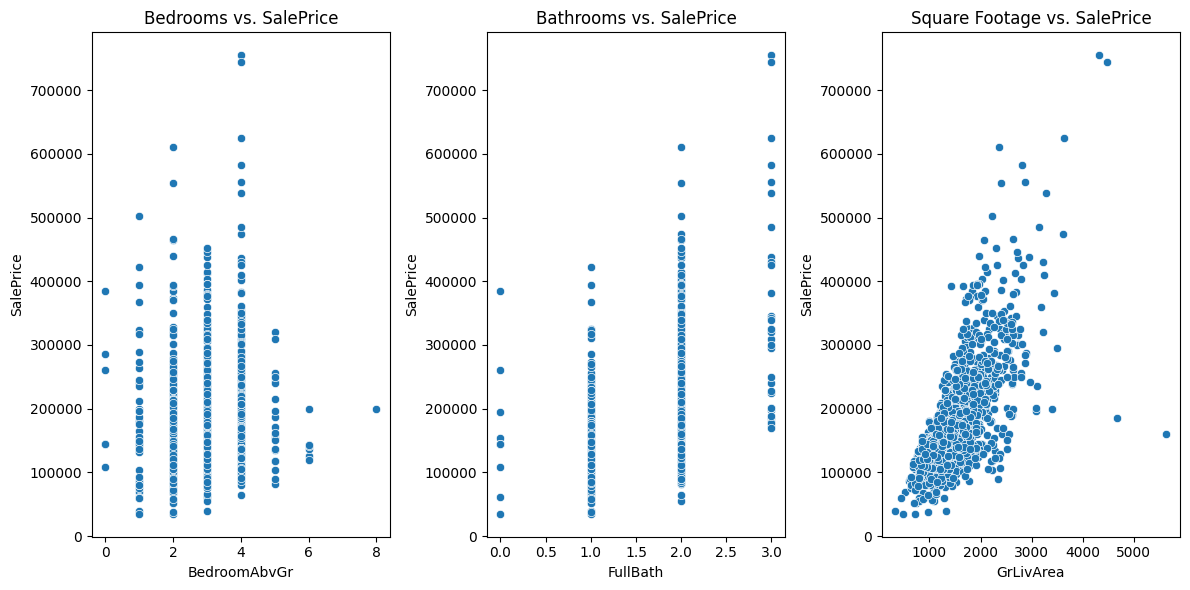

In [11]:
#Examine individual variables
print(df1.describe())

#Histograms for numerical variables
df1.hist(bins=50, figsize=(20,15))
plt.show()

#Box plots to visualize distributions and identify outliers
for col in ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, data=df1)
    plt.title(f"Box plot of {col}")
    plt.show()

# Analyze categorical variables
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"Value counts for {col}:\n{df1[col].value_counts()}\n")

# Visualize the relationship between key features and house prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df1)
plt.title('Bedrooms vs. SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x='FullBath', y='SalePrice', data=df1)
plt.title('Bathrooms vs. SalePrice')

plt.subplot(1, 3, 3)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df1)
plt.title('Square Footage vs. SalePrice')

plt.tight_layout()
plt.show()

In [12]:
# Triming the  outliers by mean.

def trim_outliers_by_mean(df1, column, threshold=3):

    mean = df1[column].mean()
    std = df1[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    df2_trimmed = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df2_trimmed

# Trim outliers for 'SalePrice' with a threshold of 3 standard deviations
df1_trimmed = trim_outliers_by_mean(df1, 'SalePrice') # Assign the result to df1_trimmed

# Trim outliers for 'GrLivArea'
df2_trimmed = trim_outliers_by_mean(df1_trimmed, 'GrLivArea') # Corrected the function call

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


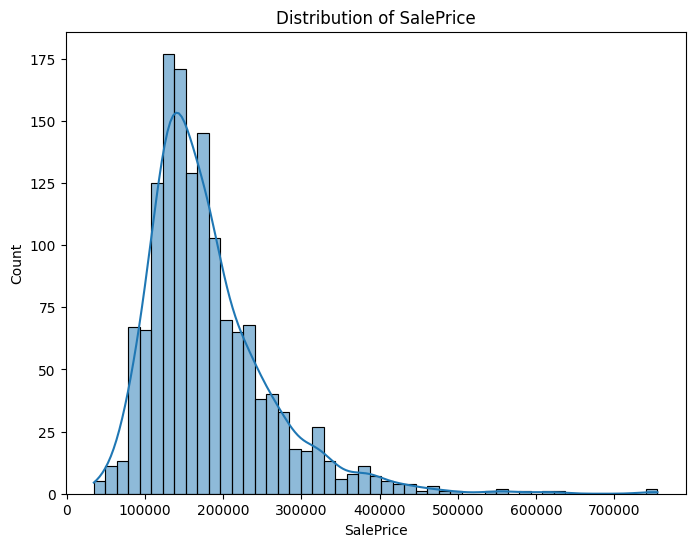

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


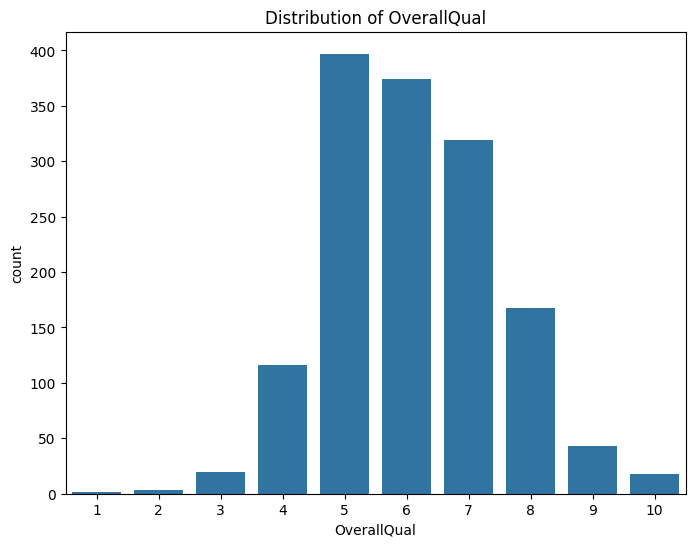

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


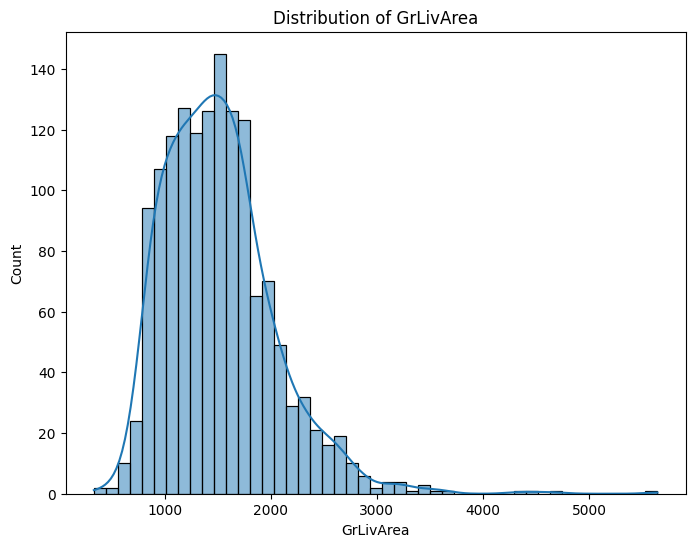

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


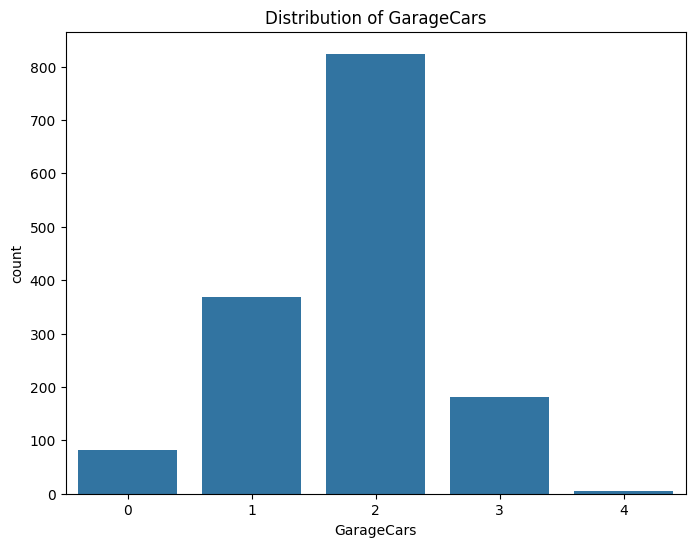

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


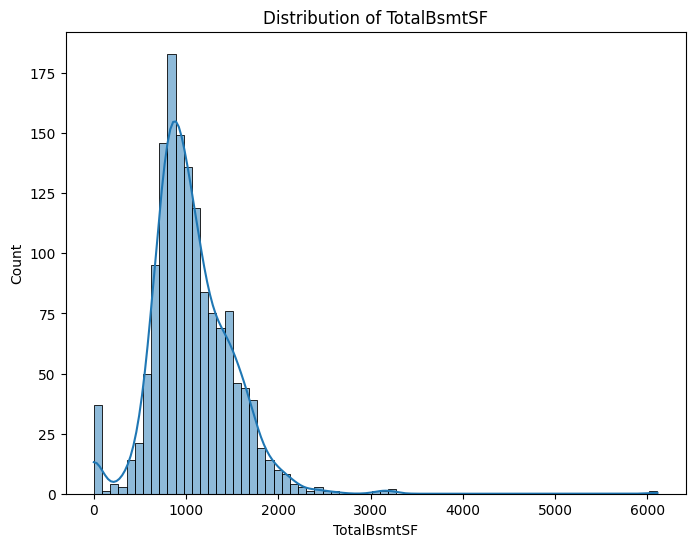

In [13]:
# Examine individual variables to understand their distributions and characteristics.

#Examine 'SalePrice'
print(df['SalePrice'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

#Examine 'OverallQual'
print(df['OverallQual'].describe())
plt.figure(figsize=(8, 6))
sns.countplot(x='OverallQual', data=df)
plt.title('Distribution of OverallQual')
plt.show()

#Examine 'GrLivArea'
print(df['GrLivArea'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea')
plt.show()

#Details 'GarageCars'
print(df['GarageCars'].describe())
plt.figure(figsize=(8, 6))
sns.countplot(x='GarageCars', data=df)
plt.title('Distribution of GarageCars')
plt.show()

# Details other relevant columns similarly
#'TotalBsmtSF':
print(df['TotalBsmtSF'].describe())
plt.figure(figsize=(8,6))
sns.histplot(df['TotalBsmtSF'], kde=True)
plt.title('Distribution of TotalBsmtSF')
plt.show()


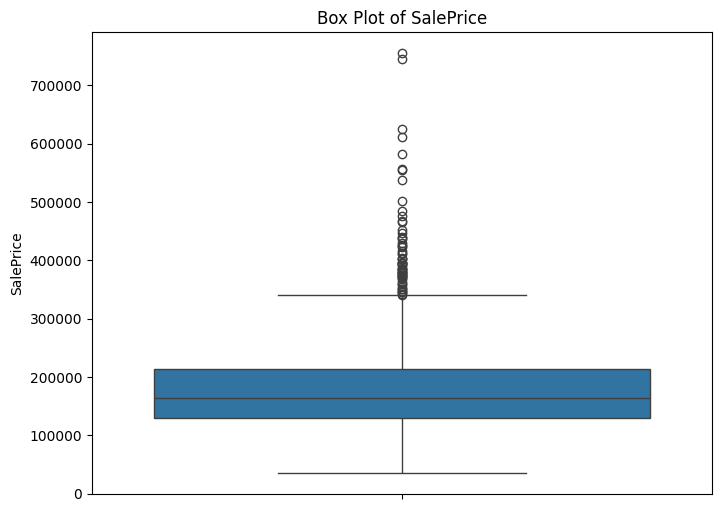

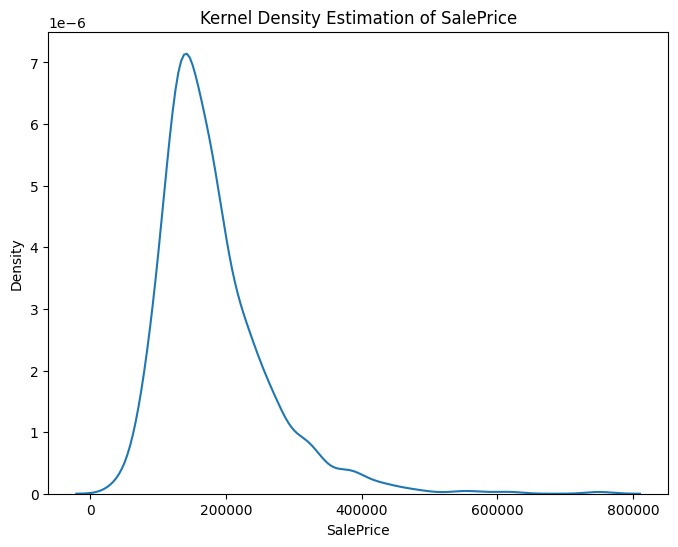

In [14]:
# Explanation: Apply a univariate analysis to understand the distribution of key variables
# like house prices. Utilize histograms, kernel density plots, or other visualizations to gain
# insights into the data.

# Exploring 'SalePrice' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='SalePrice', data=df)
plt.title('Box Plot of SalePrice')
plt.show()

# Kernel Density Estimation plot for 'SalePrice'
plt.figure(figsize=(8, 6))
sns.kdeplot(df['SalePrice'])
plt.title('Kernel Density Estimation of SalePrice')
plt.show()


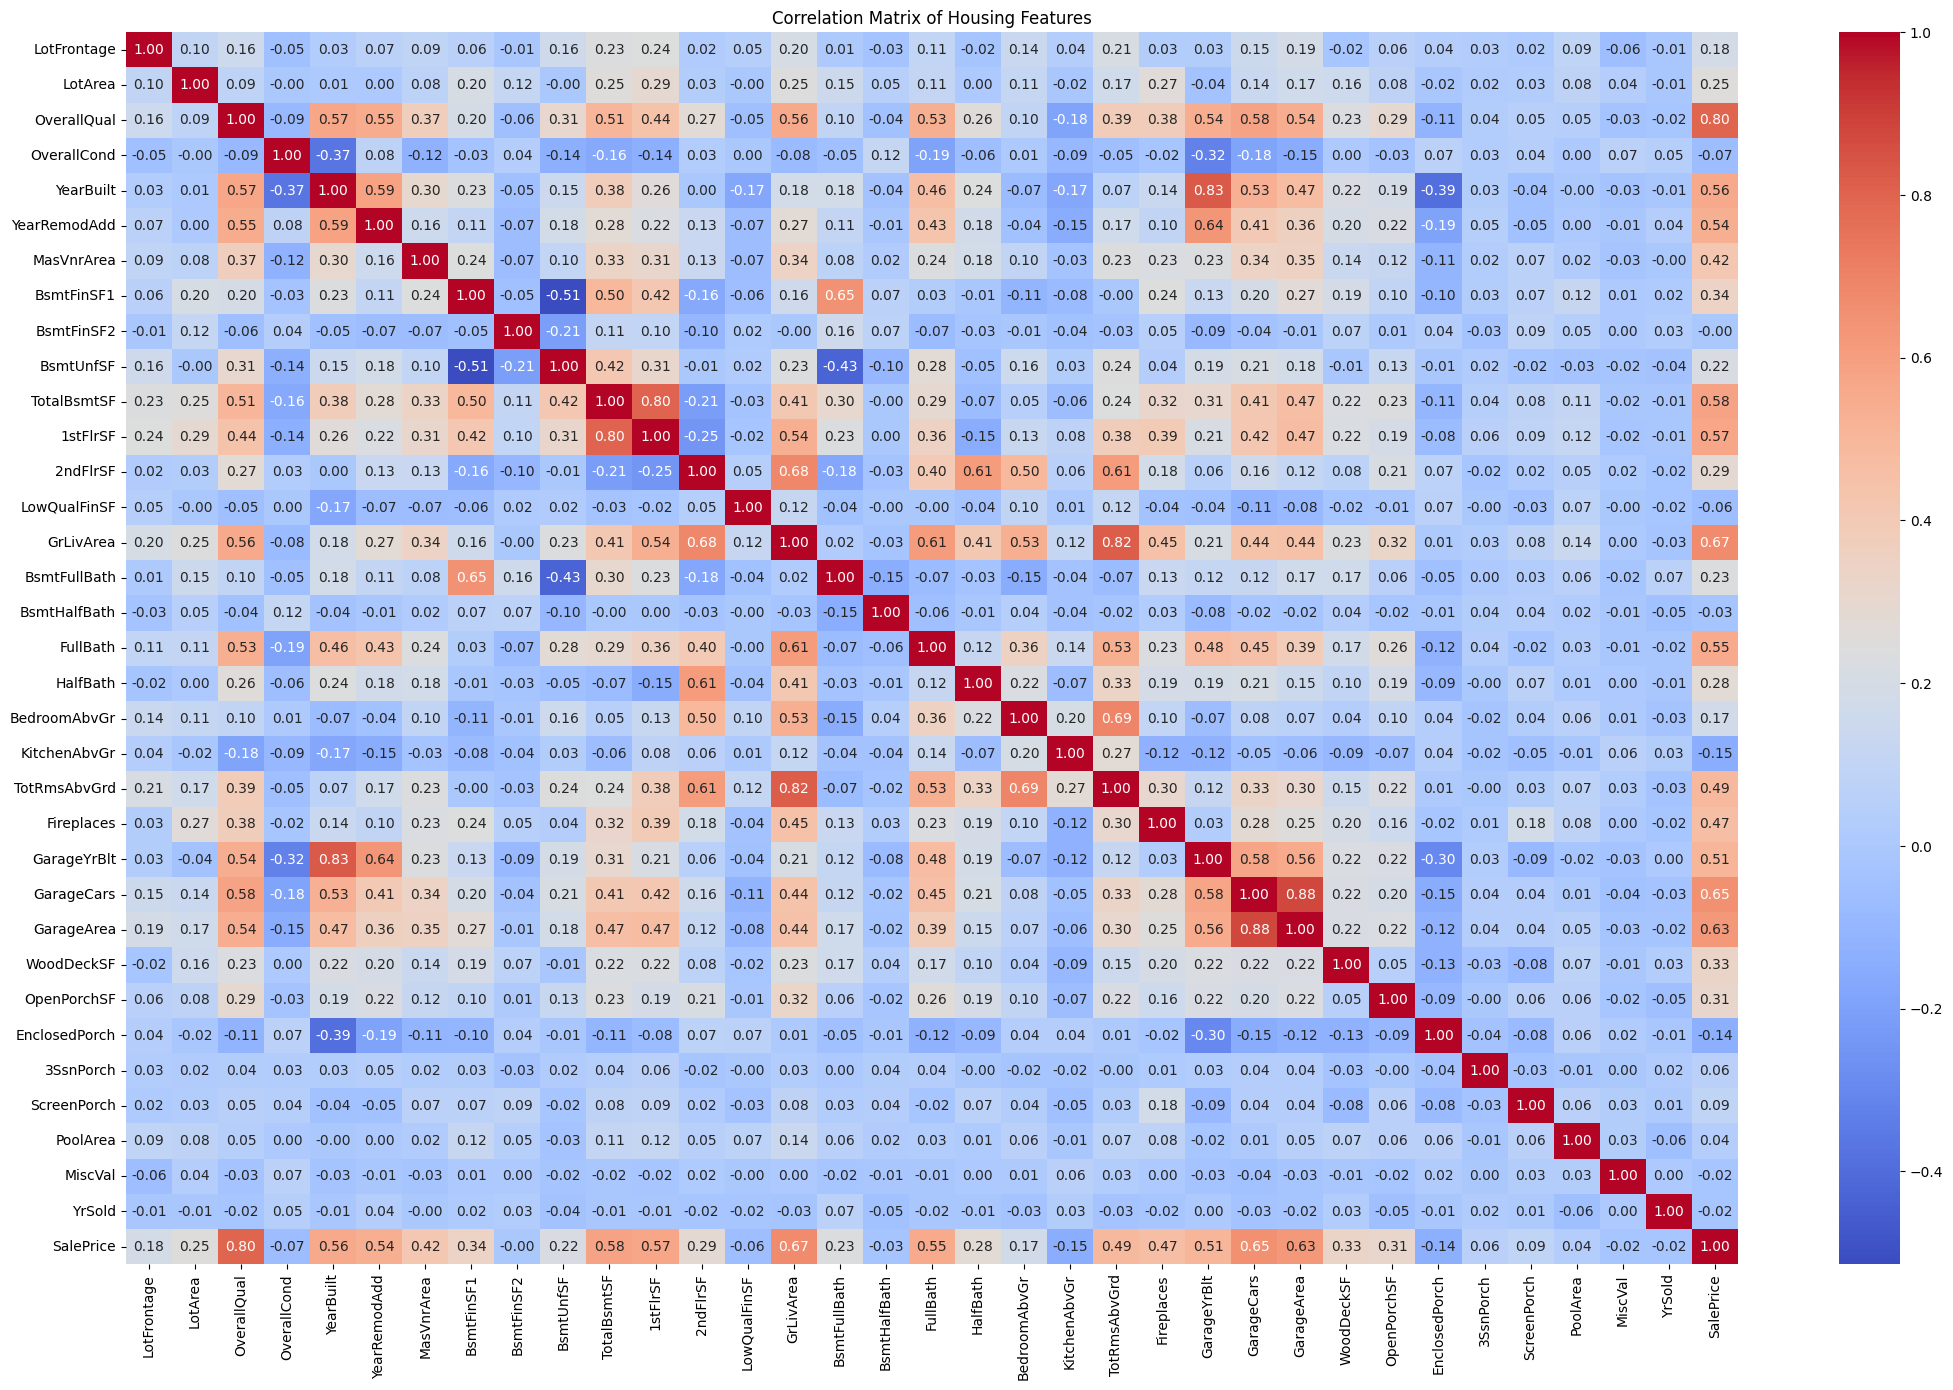

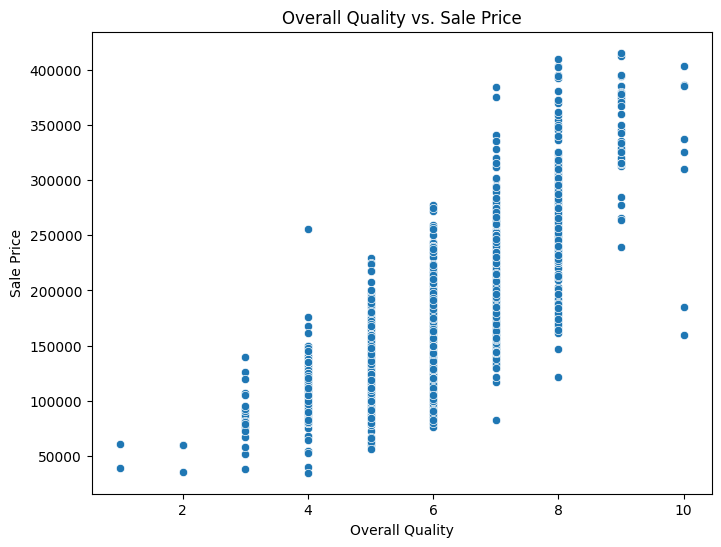

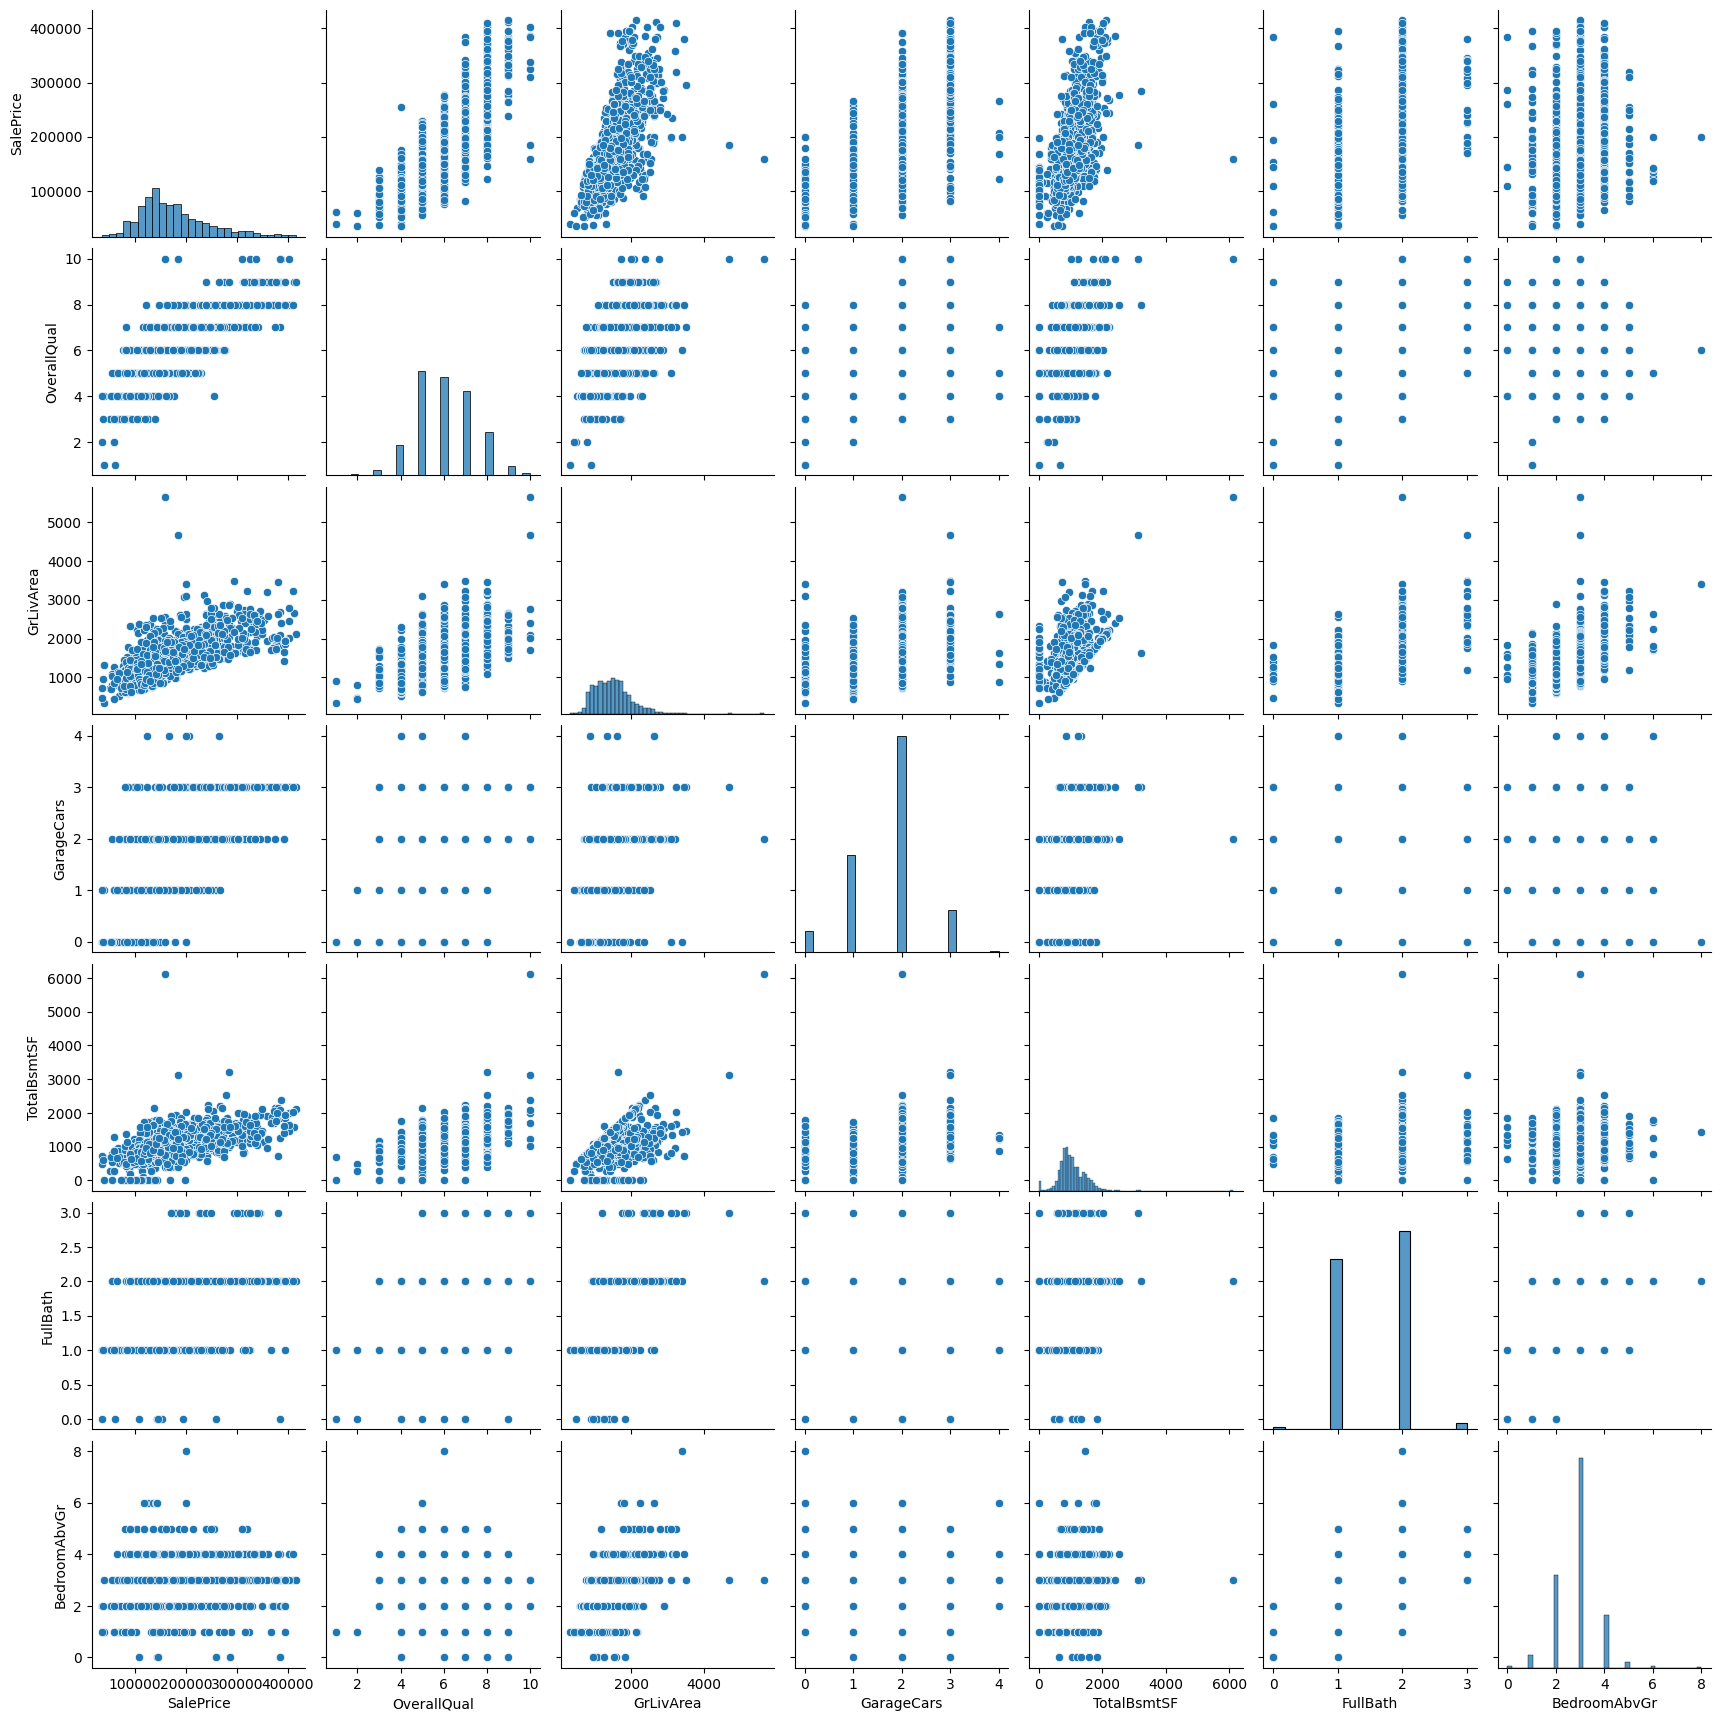

In [15]:
# Correlation matrix
# Numeric columns for correlation calculation
numeric_df = df1_trimmed.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(26, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Representing relationships between specific variables and SalePrice
# 'OverallQual' vs. 'SalePrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df1_trimmed)
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Pairplot for selected features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr']
sns.pairplot(df1_trimmed[selected_features])
plt.show()

In [16]:
# Create a new feature: Total Bathrooms
df1_trimmed['TotalBath'] = df1_trimmed['FullBath'] + 0.5 * df1_trimmed['HalfBath']

# Create a new feature: Total Square Footage (including basement)
df1_trimmed['TotalSF'] = df1_trimmed['GrLivArea'] + df1_trimmed['TotalBsmtSF']

# Create a new feature: Age of the house
# Let's 'YearBuilt' is the year the house was built
df1_trimmed['HouseAge'] = 2024 - df1_trimmed['YearBuilt']

# Create a feature representing the interaction between Overall quality and Living Area
df1_trimmed['QualLivArea'] = df1_trimmed['OverallQual'] * df1_trimmed['GrLivArea']


# Showing the updated DataFrame with the new features
print(df1_trimmed.head())


  MSSubClass  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0       SC60           65     8450   Pave      Reg         Lvl    AllPub   
1       SC20           80     9600   Pave      Reg         Lvl    AllPub   
2       SC60           68    11250   Pave      IR1         Lvl    AllPub   
3       SC70           60     9550   Pave      IR1         Lvl    AllPub   
4       SC60           84    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... MiscVal MoSold YrSold SaleType  \
0    Inside       Gtl      CollgCr  ...       0    Feb   2008       WD   
1       FR2       Gtl      Veenker  ...       0    May   2007       WD   
2    Inside       Gtl      CollgCr  ...       0    Sep   2008       WD   
3    Corner       Gtl      Crawfor  ...       0    Feb   2006       WD   
4       FR2       Gtl      NoRidge  ...       0    Dec   2008       WD   

   SaleCondition  SalePrice  TotalBath  TotalSF HouseAge QualLivArea  
0         Normal     208500

In [17]:
# Create a new feature: Price per square foot
df1_trimmed['PricePerSqFt'] = df1_trimmed['SalePrice'] / df1_trimmed['GrLivArea']

# Showing the updated DataFrame with the new features
print(df1_trimmed.head())


  MSSubClass  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0       SC60           65     8450   Pave      Reg         Lvl    AllPub   
1       SC20           80     9600   Pave      Reg         Lvl    AllPub   
2       SC60           68    11250   Pave      IR1         Lvl    AllPub   
3       SC70           60     9550   Pave      IR1         Lvl    AllPub   
4       SC60           84    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... MoSold YrSold SaleType SaleCondition  \
0    Inside       Gtl      CollgCr  ...    Feb   2008       WD        Normal   
1       FR2       Gtl      Veenker  ...    May   2007       WD        Normal   
2    Inside       Gtl      CollgCr  ...    Sep   2008       WD        Normal   
3    Corner       Gtl      Crawfor  ...    Feb   2006       WD       Abnorml   
4       FR2       Gtl      NoRidge  ...    Dec   2008       WD        Normal   

   SalePrice  TotalBath  TotalSF  HouseAge QualLivArea PricePe

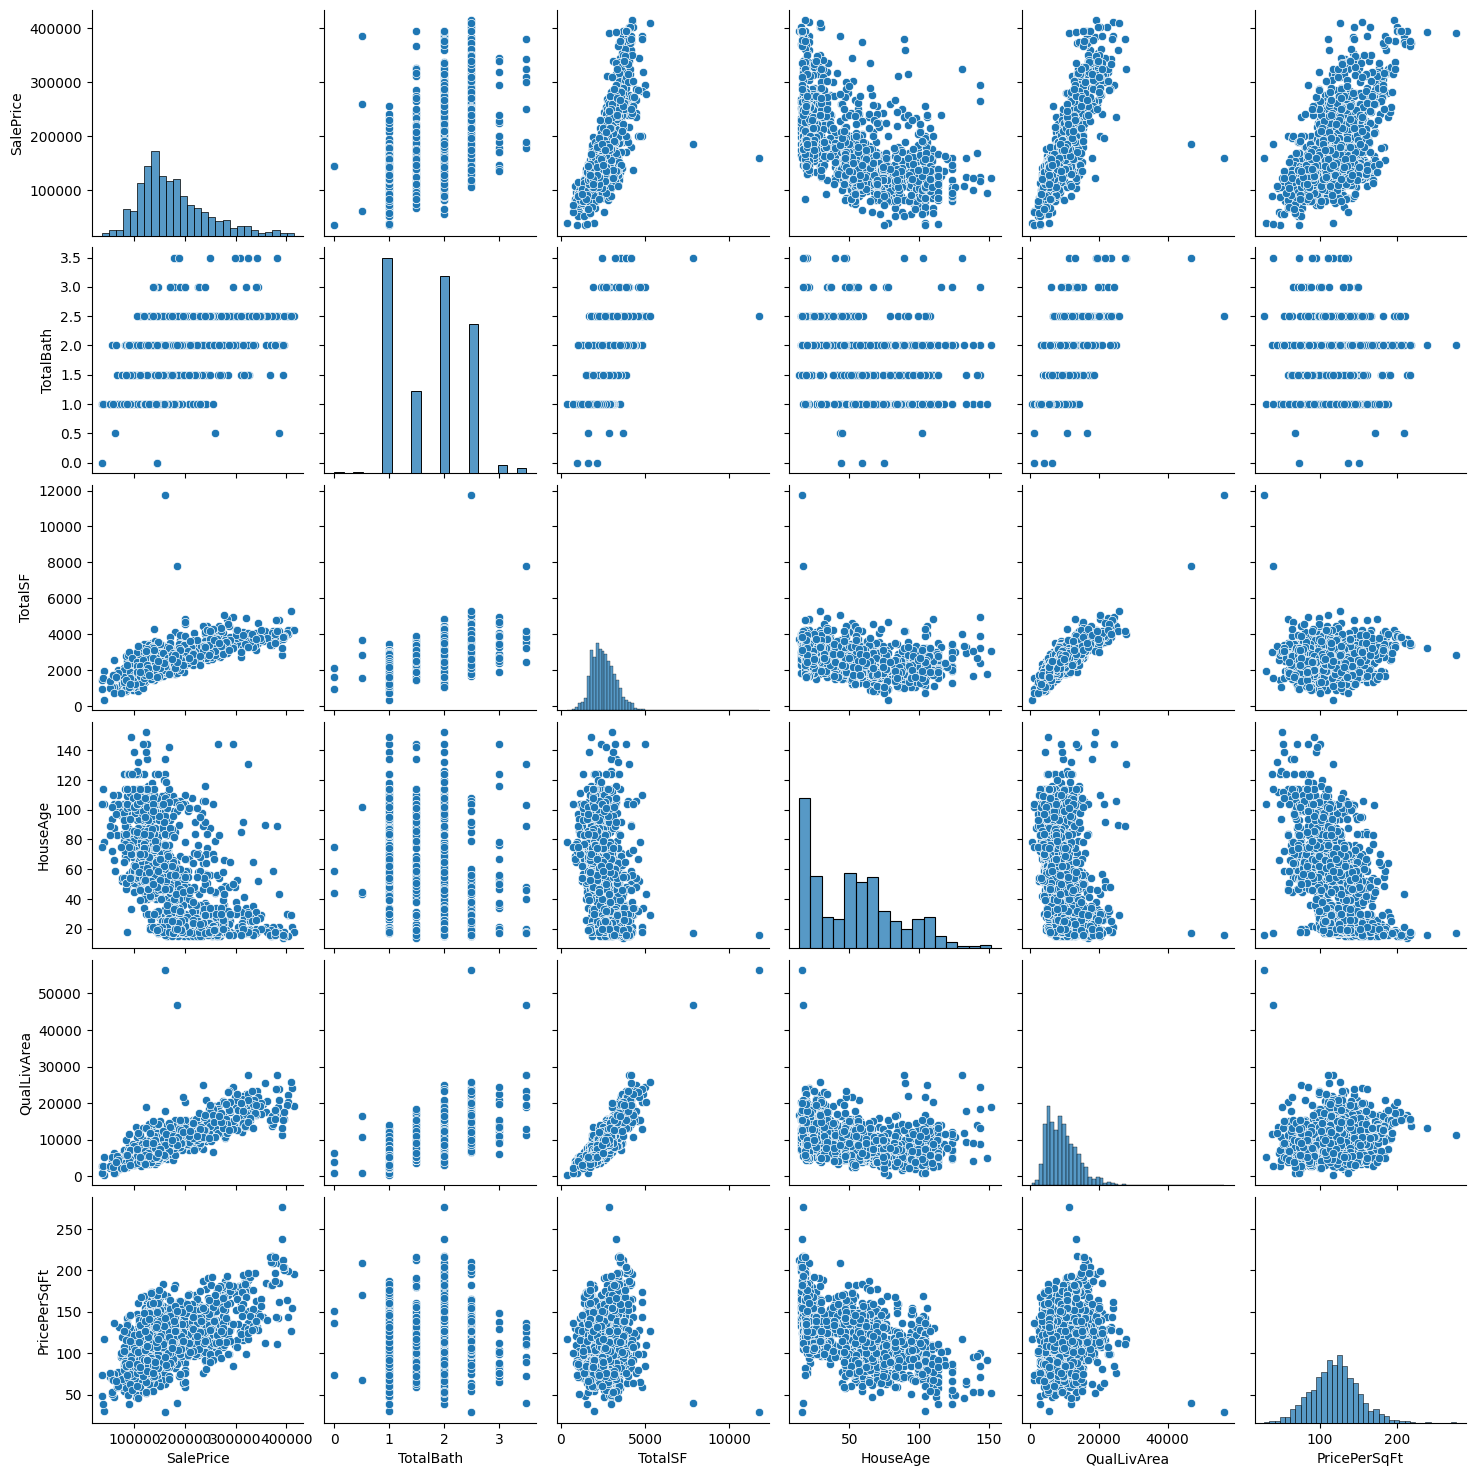

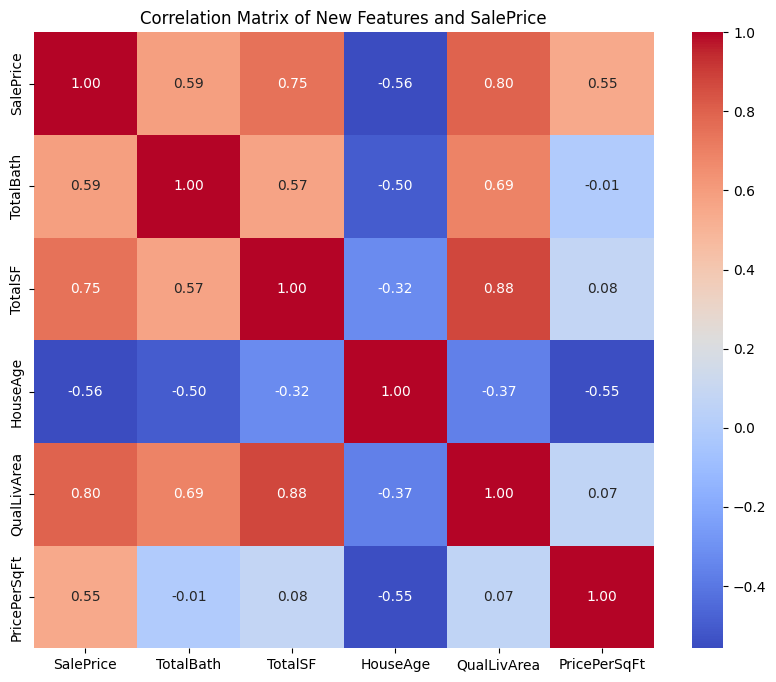

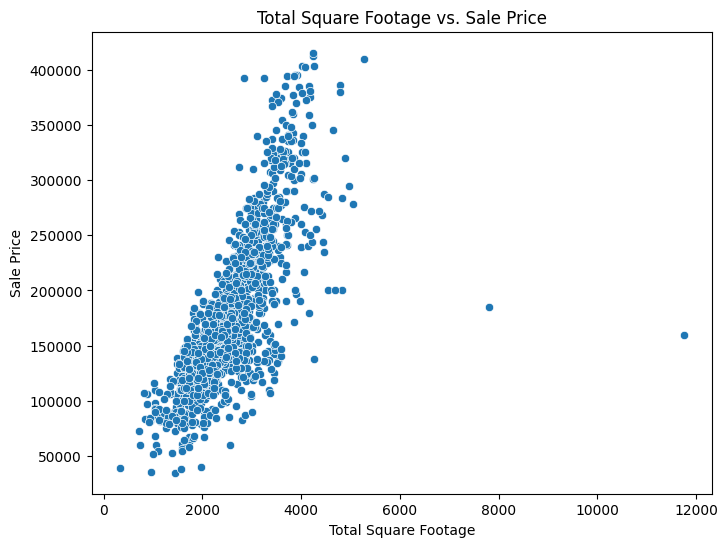

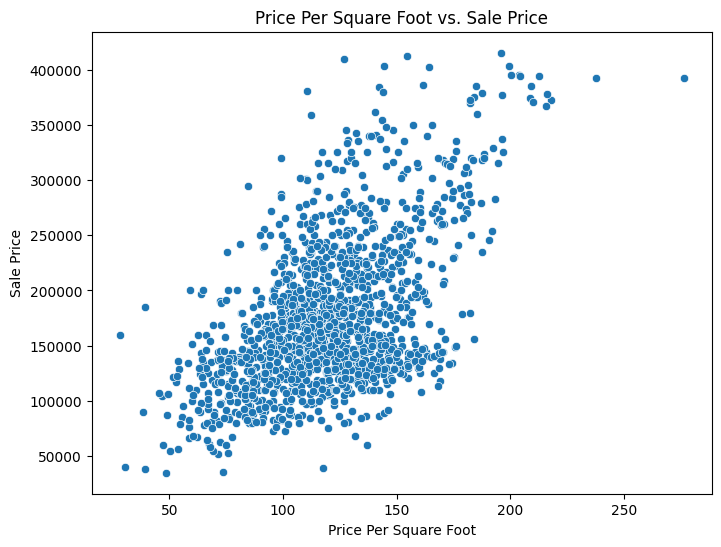

In [18]:

# Analyze the relationship between the new created features and SalePrice
selected_features = ['SalePrice', 'TotalBath', 'TotalSF', 'HouseAge', 'QualLivArea', 'PricePerSqFt']
sns.pairplot(df1_trimmed[selected_features])
plt.show()

# Calculate correlation matrix with the new features
correlation_matrix = df1_trimmed[selected_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of New Features and SalePrice')
plt.show()

# Features using scatter plots or other visualization methods
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalSF', y='SalePrice', data=df1_trimmed)
plt.title('Total Square Footage vs. Sale Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PricePerSqFt', y='SalePrice', data=df1_trimmed)
plt.title('Price Per Square Foot vs. Sale Price')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Sale Price')
plt.show()


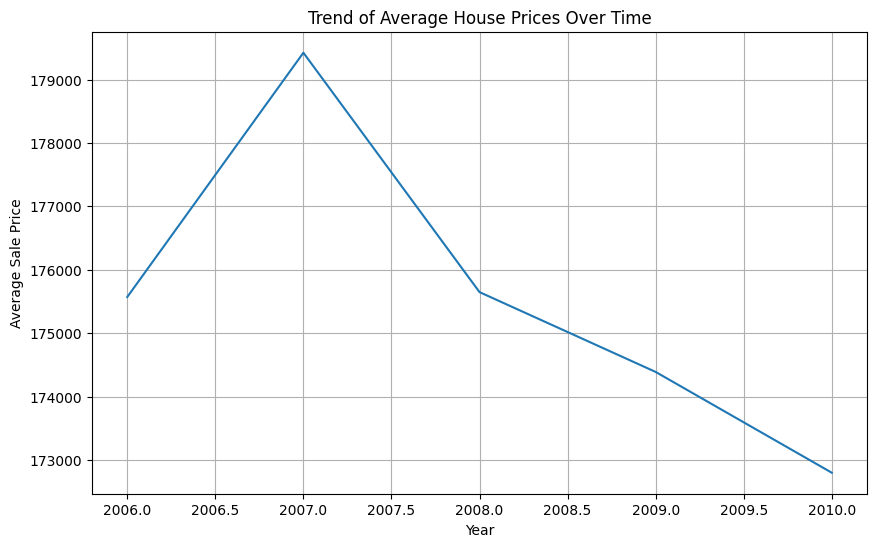

In [19]:
# Convert 'YrSold' to datetime if it's not already
df1_trimmed['YrSold'] = pd.to_datetime(df1_trimmed['YrSold'], format='%Y')

# Group data by year and calculate the average sale price
average_prices_by_year = df1_trimmed.groupby(df1_trimmed['YrSold'].dt.year)['SalePrice'].mean()

# Visualize the trend of average house prices over time
plt.figure(figsize=(10, 6))
plt.plot(average_prices_by_year.index, average_prices_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.title('Trend of Average House Prices Over Time')
plt.grid(True)
plt.show()

               Feature  Importance
36         QualLivArea    0.671330
37        PricePerSqFt    0.217760
34             TotalSF    0.041385
14           GrLivArea    0.030366
2          OverallQual    0.007244
..                 ...         ...
113    Condition2_RRAn    0.000000
293   MiscFeature_TenC    0.000000
166  Exterior2nd_Other    0.000000
64    Utilities_NoSeWa    0.000000
63    Utilities_AllPub    0.000000

[321 rows x 2 columns]


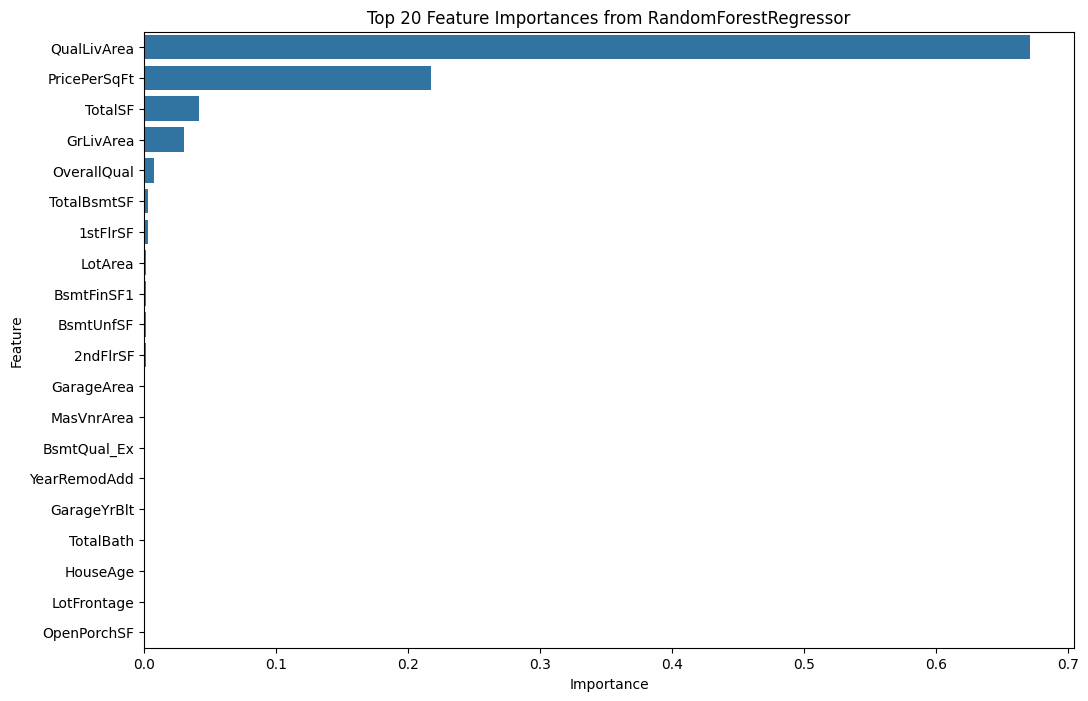

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
X = df1_trimmed.drop(['SalePrice', 'YrSold'], axis=1)  # Exclude 'SalePrice' and 'YrSold'
X = pd.get_dummies(X)

y = df1_trimmed['SalePrice']

model.fit(X, y)
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


PoolArea      0.036829
GarageCars    0.651158
Fireplaces    0.465635
SalePrice     1.000000
Name: SalePrice, dtype: float64


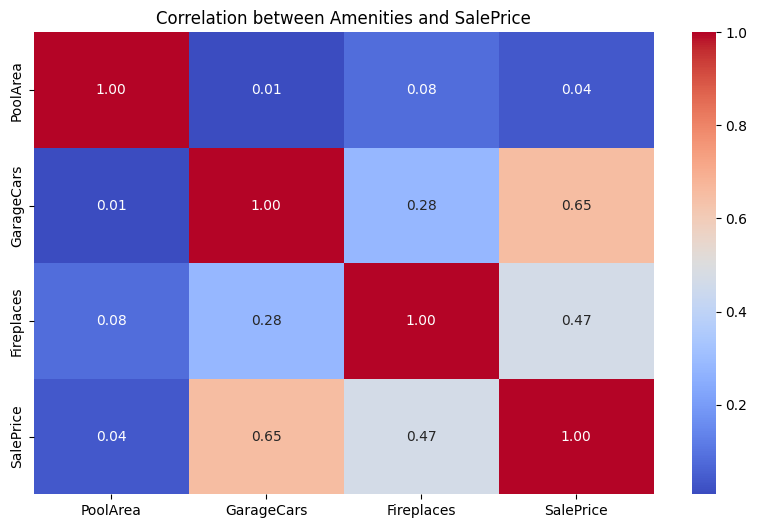

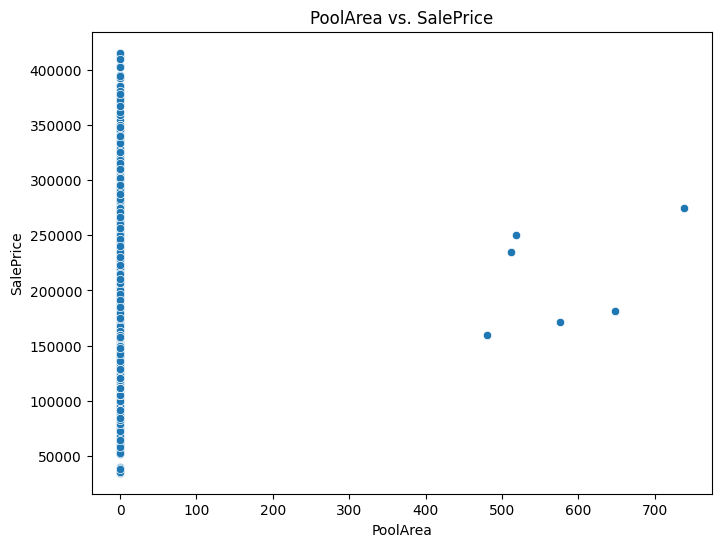

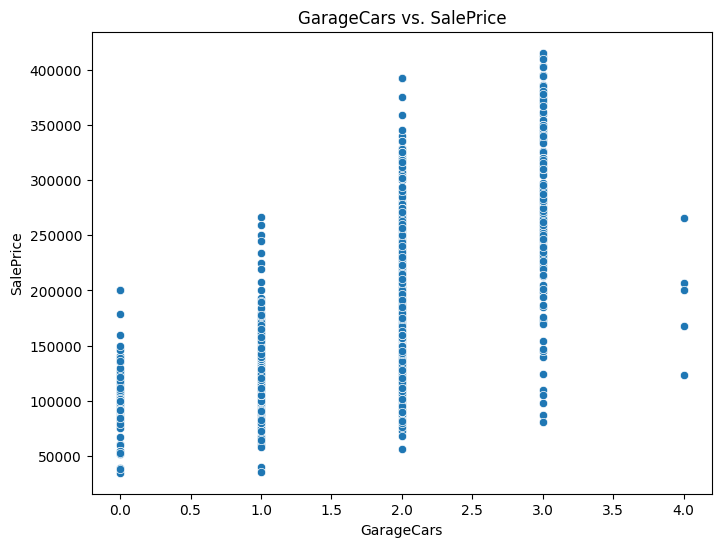

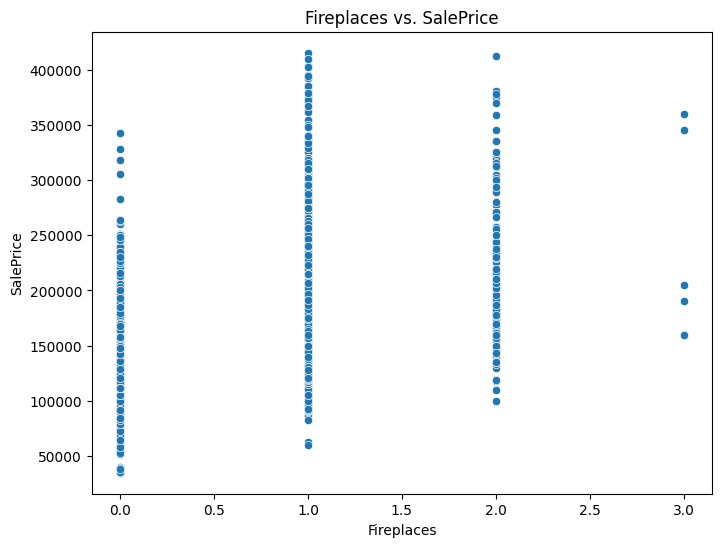

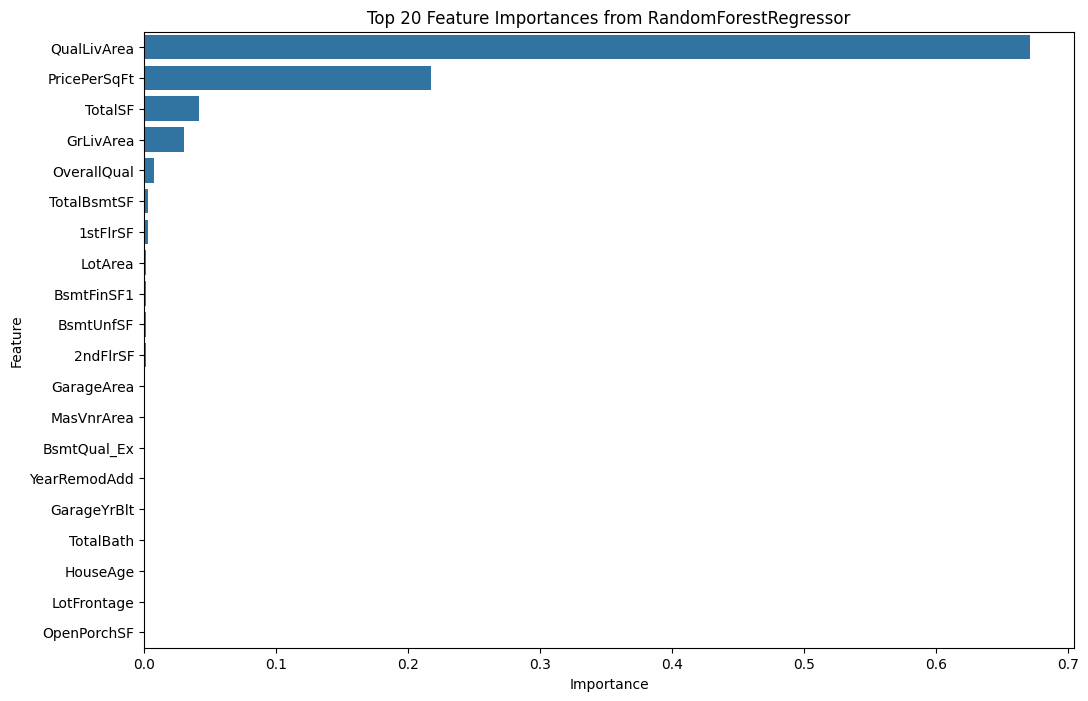

In [21]:
 #Correlation analysis
# Correlation between amenities and 'SalePrice'
amenity_columns = ['PoolArea', 'GarageCars', 'Fireplaces']

correlation_with_amenities = df1_trimmed[amenity_columns + ['SalePrice']].corr()['SalePrice']
print(correlation_with_amenities)

# Visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df1_trimmed[amenity_columns + ['SalePrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Amenities and SalePrice")
plt.show()

# Scatter plots
for amenity in amenity_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=amenity, y='SalePrice', data=df1_trimmed)
    plt.title(f'{amenity} vs. SalePrice')
    plt.show()
# Feature Importance from RandomForest

model = RandomForestRegressor(n_estimators=100, random_state=42)
X = df1_trimmed.drop(['SalePrice', 'YrSold'], axis=1)
X = pd.get_dummies(X)
y = df1_trimmed['SalePrice']
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [22]:
df1.to_csv(r'C:\Users\RAJUK\OneDrive\Desktop\Exploratory Data Analysis.csv')